# Imports


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date as date
import yfinance as yf
from utils.my_functions import unify_column_names
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
%matplotlib inline

# Data Management

In [2]:
# Data extraction
start_date = '2015-09-18'
end_date = date.today()
symbol = 'SPY'
data = yf.download(symbol, start_date, end_date, auto_adjust=True)
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2015-09-18,165.157913,167.887304,164.743865,165.377625,223657500
2015-09-21,166.011459,167.042365,164.955192,165.994555,105726200
2015-09-22,163.856598,164.321358,162.715824,163.831249,153890900
2015-09-23,163.594696,164.498854,163.011634,164.025648,92790600
2015-09-24,163.003159,163.467919,161.025829,162.369398,159378800
...,...,...,...,...,...
2025-10-09,671.159973,673.940002,669.210022,673.530029,66501900
2025-10-10,653.020020,673.950012,652.840027,672.130005,159422600


In [3]:
print(data)

Price            Close        High         Low        Open     Volume
Ticker             SPY         SPY         SPY         SPY        SPY
Date                                                                 
2015-09-18  165.157913  167.887304  164.743865  165.377625  223657500
2015-09-21  166.011459  167.042365  164.955192  165.994555  105726200
2015-09-22  163.856598  164.321358  162.715824  163.831249  153890900
2015-09-23  163.594696  164.498854  163.011634  164.025648   92790600
2015-09-24  163.003159  163.467919  161.025829  162.369398  159378800
...                ...         ...         ...         ...        ...
2025-10-09  671.159973  673.940002  669.210022  673.530029   66501900
2025-10-10  653.020020  673.950012  652.840027  672.130005  159422600
2025-10-13  663.039978  665.130005  659.770020  660.650024   79560500
2025-10-14  662.229980  665.830017  653.169983  657.169983   88779600
2025-10-15  665.169983  670.229980  658.929993  666.820007   81702600

[2534 rows x 5 colu

In [4]:
data.head(10)

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2015-09-18,165.157913,167.887304,164.743865,165.377625,223657500
2015-09-21,166.011459,167.042365,164.955192,165.994555,105726200
2015-09-22,163.856598,164.321358,162.715824,163.831249,153890900
2015-09-23,163.594696,164.498854,163.011634,164.025648,92790600
2015-09-24,163.003159,163.467919,161.025829,162.369398,159378800
2015-09-25,162.960938,164.777712,162.082116,164.473507,155054800
2015-09-28,158.871033,162.166594,158.558382,162.056738,178515900
2015-09-29,158.963989,160.332920,157.958421,159.090749,159045600


In [5]:
data.tail(10)

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2025-10-02,669.219971,670.570007,666.780029,670.450012,56896000
2025-10-03,669.210022,672.679993,668.159973,669.989990,70494400
2025-10-06,671.609985,672.510010,669.460022,671.619995,54623300
2025-10-07,669.119995,672.989990,667.669983,672.539978,72020100
2025-10-08,673.109985,673.210022,669.419983,670.250000,60702200
2025-10-09,671.159973,673.940002,669.210022,673.530029,66501900
2025-10-10,653.020020,673.950012,652.840027,672.130005,159422600
2025-10-13,663.039978,665.130005,659.770020,660.650024,79560500


In [6]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
count,2534.000000,2534.000000,2534.000000,2534.000000,2.534000e+03
mean,343.530650,345.339053,341.416885,343.460294,8.345919e+07
std,131.830898,132.436604,131.079341,131.806934,4.160811e+07
min,155.438828,156.492885,153.874721,154.996802,2.027000e+07
25%,236.436714,237.725472,234.681819,236.473281,5.769902e+07
50%,316.131393,318.489420,313.857111,316.995917,7.375330e+07
75%,425.010399,427.039528,422.572264,424.969327,9.621048e+07
max,673.109985,673.950012,669.460022,673.530029,3.922207e+08


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2534 entries, 2015-09-18 to 2025-10-15
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, SPY)   2534 non-null   float64
 1   (High, SPY)    2534 non-null   float64
 2   (Low, SPY)     2534 non-null   float64
 3   (Open, SPY)    2534 non-null   float64
 4   (Volume, SPY)  2534 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 118.8 KB


In [8]:
# Apply transformation to column names
data.columns = data.columns.map(unify_column_names)

In [9]:
print(f"Unified columns names: \n{data.columns}")

Unified columns names: 
MultiIndex([( 'close', 'spy'),
            (  'high', 'spy'),
            (   'low', 'spy'),
            (  'open', 'spy'),
            ('volume', 'spy')],
           names=['Price', 'Ticker'])


In [10]:
# Add returns and range
df = data.copy()
df["returns"] = df["close"].pct_change()
df["range"] = (df["high"] / df["low"]) - 1

In [11]:
df.head(10)

Price,close,high,low,open,volume,returns,range
Ticker,spy,spy,spy,spy,spy,,
Date,,,,,,,
2015-09-18,165.615829,168.352787,165.200633,165.836150,223657500,NaN,0.019081
2015-09-21,166.471710,167.505474,165.412514,166.454759,105726200,0.005168,0.012653
2015-09-22,164.310898,164.776946,163.166961,164.285478,153890900,-0.012980,0.009867
2015-09-23,164.048248,164.954913,163.463570,164.480396,92790600,-0.001598,0.009123
2015-09-24,163.455063,163.921112,161.472252,162.819545,159378800,-0.003616,0.015166
2015-09-25,163.412720,165.234531,162.531462,164.929482,155054800,-0.000259,0.016631
2015-09-28,159.311462,162.616160,158.997945,162.505999,178515900,-0.025098,0.022756
2015-09-29,159.404709,160.777435,158.396353,159.531820,159045600,0.000585,0.015032


In [12]:
# Determine the total of NA values and drop them
na_count = df.isna().sum().sum()
if na_count > 0:
    print(f"Dropping {na_count} NA value(s)")
    df.dropna(inplace=True)

Dropping 1 NA value(s)


In [13]:
# Structure data
X_train = df[["returns", "range"]]
X_train.head(10)

Price,returns,range
Ticker,,
Date,,
2015-09-21,0.005168,0.012653
2015-09-22,-0.012980,0.009867
2015-09-23,-0.001598,0.009123
2015-09-24,-0.003616,0.015166
2015-09-25,-0.000259,0.016631
2015-09-28,-0.025098,0.022756
2015-09-29,0.000585,0.015032
2015-09-30,0.018658,0.012616


# HMM Learning

In [14]:
# Fit model
hmm_model = GaussianHMM(n_components=4, covariance_type="full", n_iter=1000, random_state=42).fit(X_train)
hmm_model_score = hmm_model.score(X_train)
print(f"HMM score: {hmm_model_score}")

Model is not converging.  Current: 18065.161706442126 is not greater than 18065.209054341653. Delta is -0.04734789952635765


HMM score: 18065.046531647222


In [15]:
# Check results
hidden_states = hmm_model.predict(X_train)
print(hidden_states[:100])
print(len(hidden_states))

[2 2 2 2 2 0 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 2 2 2 2 1 1 1 1 1 1 1 1 0 0 2 2 2 0 2 0 2 2 2 0 0 2 1 1 1 1 1 1 1 0 2
 2 0 0 2 2 0 2 0 2 0 2 2 0 2 0 2 2 2 0 2 2 0 0 2 2 0]
2482


In [16]:
dir(hmm_model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accumulate_sufficient_statistics',
 '_accumulate_sufficient_statistics_log',
 '_accumulate_sufficient_statistics_scaling',
 '_build_request_for_signature',
 '_check',
 '_check_and_set_n_features',
 '_check_sum_1',
 '_compute_likelihood',
 '_compute_log_likelihood',
 '_compute_lower_bound',
 '_compute_posteriors_log',
 '_compute_posteriors_scaling',
 '_covars_',
 '_decode_map',
 '_decode_viterbi',
 '_do_estep',
 '_do_mstep',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estep_begin',
 '_fit_log',
 '_fit_scaling

In [17]:
# Regime state means for each feature
hmm_model.means_

array([[-0.01295798,  0.02126067],
       [ 0.00153834,  0.00722223],
       [ 0.00532609,  0.01460798],
       [-0.00311355,  0.04878866]])

In [18]:
# Regime state covariances
hmm_model.covars_

array([[[1.46300340e-04, 9.54729977e-06],
        [9.54729977e-06, 9.95246673e-05]],

       [[3.64505798e-05, 7.70478865e-06],
        [7.70478865e-06, 1.61294988e-05]],

       [[1.24746333e-04, 3.81626112e-05],
        [3.81626112e-05, 4.77252822e-05]],

       [[2.24810195e-03, 3.27610274e-04],
        [3.27610274e-04, 5.94032271e-04]]])

# Data Visualization

In [19]:
# Structure prices for plotting

# Initialize lists for each hidden state
labels_0 = []
labels_1 = []
labels_2 = []
labels_3 = []

# Convert close prices to NumPy array
prices = df["close"].values.astype(float)

# Verify dimensions
print(f"Correct number of rows: {len(prices) == len(hidden_states)}")

Correct number of rows: True


In [20]:
# Assign prices to respective state labels, filling others with NaN
for i, s in enumerate(hidden_states):
    price_value = prices[i].item()

    labels_0.append(price_value if s == 0 else np.nan)
    labels_1.append(price_value if s == 1 else np.nan)
    labels_2.append(price_value if s == 2 else np.nan)
    labels_3.append(price_value if s == 3 else np.nan)


Final colors:
State 0: Returns=-0.012958, Range=0.021261 -> orange
State 1: Returns=0.001538, Range=0.007222 -> green
State 2: Returns=0.005326, Range=0.014608 -> lightgreen
State 3: Returns=-0.003114, Range=0.048789 -> red


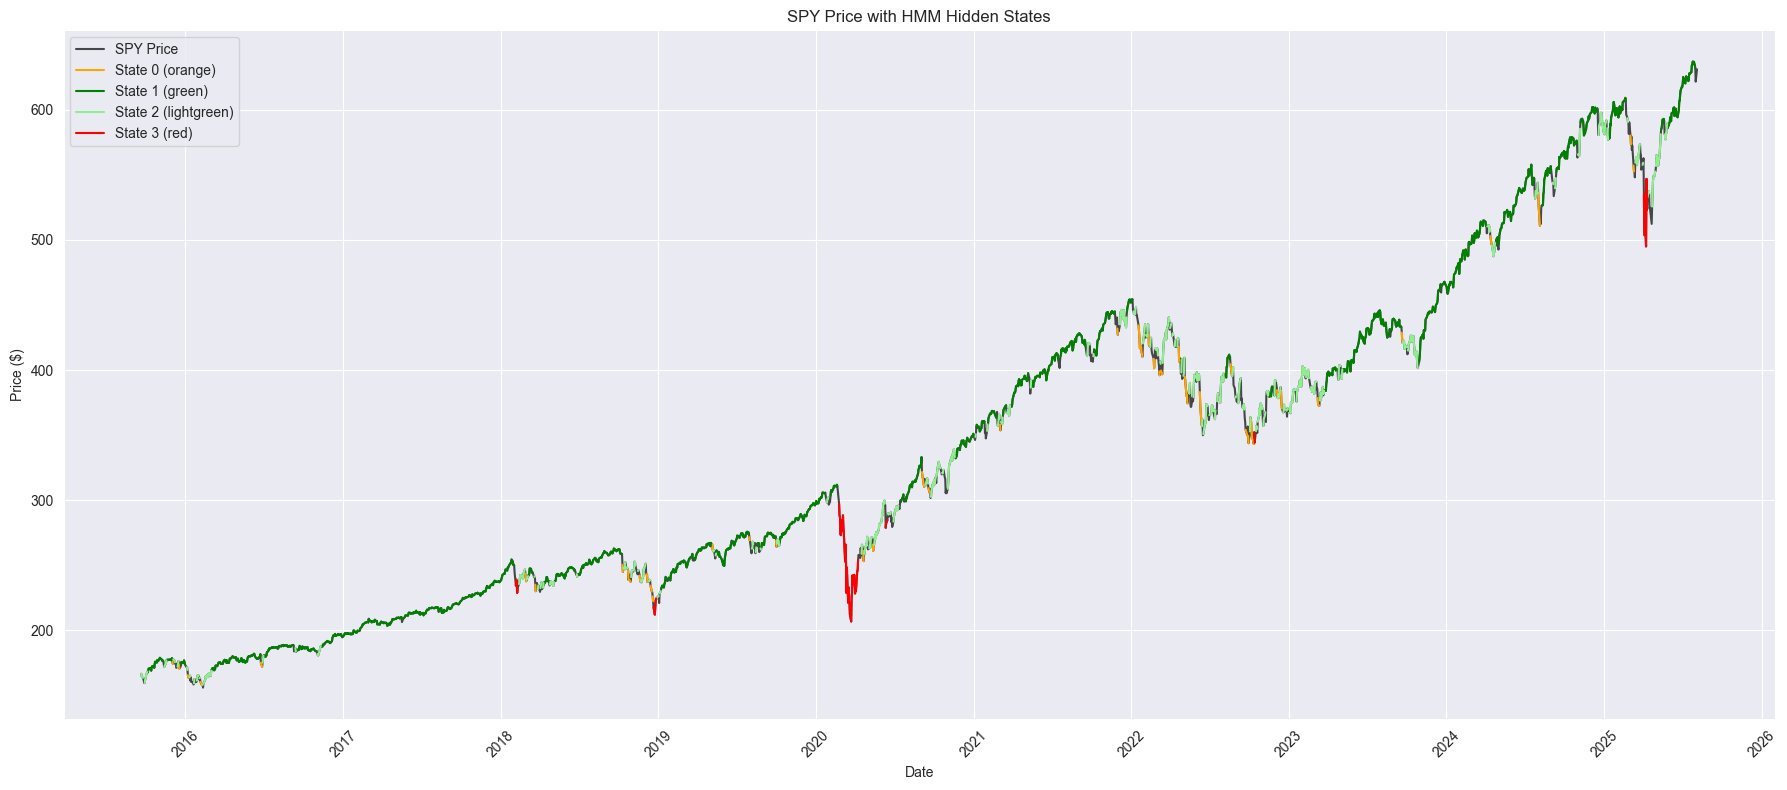

In [21]:
# Classify states based on means
def classify_states_by_means(means):
    """Universal classification that adapts to any asset"""
    returns = means[:, 0]
    ranges = means[:, 1]

    return_ranks = np.argsort(returns)

    highest_return_state = return_ranks[-1]
    second_highest_return_state = return_ranks[-2]
    second_lowest_return_state = return_ranks[1]
    lowest_return_state = return_ranks[0]

    state_colors = {}
    assigned = set()

    # Assign colors based on return magnitude
    if returns[highest_return_state] > 0:
        # If highest return is very high, use green
        # If moderate, use light green
        if returns[highest_return_state] > 0.02:  # High threshold
            state_colors[highest_return_state] = 'green'
        else:
            state_colors[highest_return_state] = 'lightgreen'
        assigned.add(highest_return_state)

    if returns[second_highest_return_state] > 0:
        # Assign opposite shade from highest
        if returns[highest_return_state] > 0.02:
            state_colors[second_highest_return_state] = 'lightgreen'
        else:
            state_colors[second_highest_return_state] = 'green'
        assigned.add(second_highest_return_state)

    if returns[lowest_return_state] < 0:
        # If lowest return is very low, use red
        # If moderate, use orange
        if returns[lowest_return_state] < -0.02:  # Low threshold (negative)
            state_colors[lowest_return_state] = 'red'
        else:
            state_colors[lowest_return_state] = 'orange'
        assigned.add(lowest_return_state)

    if returns[second_lowest_return_state] < 0:
        # Assign opposite shade from lowest
        if returns[lowest_return_state] < -0.02:
            state_colors[second_lowest_return_state] = 'orange'
        else:
            state_colors[second_lowest_return_state] = 'red'
        assigned.add(second_lowest_return_state)

    return state_colors

# Test it
dynamic_colors = classify_states_by_means(hmm_model.means_)
print("\nFinal colors:")
for i in range(4):
    mean = hmm_model.means_[i]
    print(f"State {i}: Returns={mean[0]:.6f}, Range={mean[1]:.6f} -> {dynamic_colors[i]}")

# Plot chart with dynamic colors
dates = df.index
prices = df['close']

fig = plt.figure(figsize=(18, 8))
plt.plot(dates, prices, color='black', alpha=0.7, label=f'{symbol} Price')

# Use dynamic colors instead of hardcoded ones
plt.plot(dates, labels_0, color=dynamic_colors[0], label=f'State 0 ({dynamic_colors[0]})')
plt.plot(dates, labels_1, color=dynamic_colors[1], label=f'State 1 ({dynamic_colors[1]})')
plt.plot(dates, labels_2, color=dynamic_colors[2], label=f'State 2 ({dynamic_colors[2]})')
plt.plot(dates, labels_3, color=dynamic_colors[3], label=f'State 3 ({dynamic_colors[3]})')

plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title(f'{symbol} Price with HMM Hidden States')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()